In [187]:
#import all tweet data from S3 bucket onto Midway and save locally
import pandas as pd
fn_all = "https://viralsentimentstweetbucket.s3.amazonaws.com/tweets_all.csv"

all_df = pd.read_csv(fn_all)

/software/Anaconda3-2019.03-el7-x86_64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
all_df.to_csv("tweets_all.csv")

In [118]:
from dask_jobqueue import SLURMCluster

# Compose SLURM script

cluster = SLURMCluster(queue='broadwl', cores=10, memory='40GB', 

                       processes=10, walltime='03:00:00', interface='ib0',

                       job_extra=['--account=macs30123']

                      )

# Request resources
cluster.scale(jobs=1)

/home/jadebenson/.local/lib/python3.7/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35380 instead
  expected, actual


In [120]:
! squeue -u jadebenson

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          11551385   broadwl dask-wor jadebens  R       1:35      1 midway2-0051


In [121]:
from dask.distributed import Client

client = Client(cluster)

client


<Client: 'tcp://172.25.220.71:44467' processes=10 threads=10, memory=37.30 GiB>

In [125]:
import dask.dataframe as dd
dd_df = dd.from_pandas(all_df, npartitions = 10)

In [60]:
dd_df.head(30)

Unnamed: 0  tweet_ID                  user_location     tweet_created_at  \
0            0       NaN             Harrogate, England  2021-06-02 16:44:15   
1            1       NaN                  Mumbai, India  2021-06-02 16:44:15   
2            2       NaN                            NaN  2021-06-02 16:44:15   
3            3       NaN                            NaN  2021-06-02 16:44:15   
4            4       NaN                  Karjat, India  2021-06-02 16:44:15   
5            5       NaN                            NaN  2021-06-02 16:44:15   
6            6       NaN                   Maui, Hawaii  2021-06-02 16:44:15   
7            7       NaN                     Texas, USA  2021-06-02 16:44:15   
8            8       NaN                            NaN  2021-06-02 16:44:15   
9            9       NaN                  Mumbai, India  2021-06-02 16:44:15   
10          10       NaN                            NaN  2021-06-02 16:44:15   
11          11       NaN  The UnitedStates of Jack Shit  2021-06-02 16:44:14   
12          12       NaN               𝙈𝙎 | 𝙈𝙑 | 𝙈𝘼𝙏𝙐𝙍𝙀  2021-06-02 16:44:14   
13          13       NaN                     Tucson, AZ  2021-06-02 16:44:14   
14          14       NaN        West Village, Manhattan  2021-06-02 16:44:14   
15          15       NaN                            NaN  2021-06-02 16:44:14   
16          16       NaN                Penang,Malaysia  2021-06-02 16:44:14   
17          17       NaN                            NaN  2021-06-02 16:44:14   
18          18       NaN          🇳🇬 plus anywhere else  2021-06-02 16:44:14   
19          19       NaN                            NaN  2021-06-02 16:44:14   
20          20       NaN                            NaN  2021-06-02 17:01:10   
21          21       NaN                        Ipswich  2021-06-02 17:01:10   
22          22       NaN                   Florida, USA  2021-06-02 17:01:10   
23          23       NaN                Alberta, Canada  2021-06-02 17:01:10   
24          24       NaN                       La Jolla  2021-06-02 17:01:10   
25          25       NaN                            NaN  2021-06-02 17:01:10   
26          26       NaN                      Ohio, USA  2021-06-02 17:01:10   
27          27       NaN         Lansing, Michigan, USA  2021-06-02 17:01:10   
28          28       NaN                            NaN  2021-06-02 17:01:10   
29          29       NaN                            NaN  2021-06-02 17:01:10   

                                                 text hashtags sentiment_code  \
0   If you think the Covid propaganda has been bad...       []       NEGATIVE   
1   1) If health is state subject, why's there a U...       []       NEGATIVE   
2   The next time someone asks you to put your mas...       []        NEUTRAL   
3   I will continue wearing a mask so people don’t...       []       NEGATIVE   
4   SAMAAVESHI - MAY2021 REPORT!\n\n1. COVID 2.0/F...       []        NEUTRAL   
5   DOH 🤦‍♂️Vaccine sceptic Noel Gallagher is conv...       []        NEUTRAL   
6   We now know Mark Zuckerberg was influential in...       []       NEGATIVE   
7   @PaulRoundy1 Also, I don’t agree that the core...       []       NEGATIVE   
8   Dera Sacha Sauda has started a new website for...       []        NEUTRAL   
9   Odisha CM Naveen Patnaik writes to all chief m...       []        NEUTRAL   
10  Under real world conditions and at full vaccin...       []        NEUTRAL   
11  @Joeybatz33 They need to avoid Covid and the i...       []        NEUTRAL   
12  He's bending down in the slightest\nto adjust ...       []        NEUTRAL   
13  Kellie Hart started a bike club to relieve str...       []        NEUTRAL   
14  im not saying that the US is covering up their...       []       NEGATIVE   
15  124-year-old Rehtee Begum from Shrakwara Block...       []        NEUTRAL   
16  @inazham__ @fedtriyahya yes bestie gotchu http...       []        NEUTRAL   
17  @Colleen06969385 @michaeljknowles Covid seems ...       []   

In [61]:
dd_df.count().compute()

Unnamed: 0           328224
tweet_ID                  0
user_location        245370
tweet_created_at     328224
text                 328224
hashtags             187251
sentiment_code       328224
positive_score       328224
negative_score       328224
neutral_score        328224
mixed_score          187251
searchwords               0
tweet_id             328224
mask_marker          328224
cdc_marker           328224
vaccine_marker       328224
lockdown_marker      328224
quarantine_marker    328224
pfizer_marker        328224
moderna_marker       328224
covid_marker         328224
stayathome_marker    328224
jj_marker            328224
dtype: int64

In [126]:
dd_df = dd_df.mask(dd_df == "MIXED", "NEUTRAL")

/software/Anaconda3-2019.03-el7-x86_64/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [127]:
sent_markers = dd_df.groupby("sentiment_code").sum().compute().loc[:, 'mask_marker':'jj_marker']

In [68]:
sent_markers

mask_marker  cdc_marker  vaccine_marker  lockdown_marker  \
sentiment_code                                                             
NEGATIVE             9478.0      2119.0         23248.0          14447.0   
NEUTRAL             10443.0      2397.0         37768.0          19475.0   
POSITIVE             8285.0      1058.0         20020.0           6510.0   

                quarantine_marker  pfizer_marker  moderna_marker  \
sentiment_code                                                     
NEGATIVE                   6276.0         2324.0           573.0   
NEUTRAL                    9124.0         4242.0          1232.0   
POSITIVE                   2678.0         1830.0           625.0   

                covid_marker  stayathome_marker  jj_marker  
sentiment_code                                              
NEGATIVE             46335.0               11.0      153.0  
NEUTRAL              67084.0              224.0      172.0  
POSITIVE             39222.0               90.0      243.0

In [129]:
for col in sent_markers.columns:
    sent_markers[col] = sent_markers[col] / sent_markers[col].sum()

In [131]:
sent_markers

Mask       CDC   Vaccine  Lockdown  Quarantine    Pfizer  \
sentiment_code                                                                 
NEGATIVE        0.336028  0.380158  0.286885  0.357316    0.347162  0.276798   
NEUTRAL         0.370240  0.430032  0.466064  0.481673    0.504702  0.505241   
POSITIVE        0.293732  0.189810  0.247051  0.161011    0.148136  0.217961   

                 Moderna     COVID  Stay At Home       J&J  
sentiment_code                                              
NEGATIVE        0.235802  0.303555      0.033846  0.269366  
NEUTRAL         0.506996  0.439489      0.689231  0.302817  
POSITIVE        0.257202  0.256956      0.276923  0.427817

In [130]:
sent_markers = sent_markers.rename(columns = {"mask_marker": "Mask", "cdc_marker": "CDC", "vaccine_marker": "Vaccine", "lockdown_marker": "Lockdown", "quarantine_marker": "Quarantine", "pfizer_marker": "Pfizer", "moderna_marker": "Moderna", "covid_marker":"COVID", "stayathome_marker": "Stay At Home", "jj_marker":"J&J"})

In [73]:
import matplotlib.pyplot as plt



In [89]:
color_markers = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "black", "brown", "silver"]

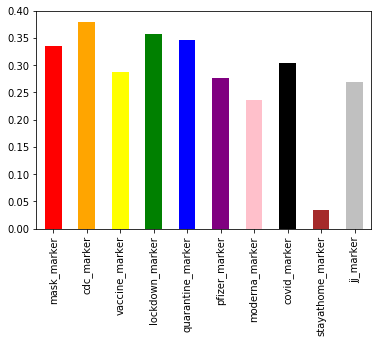

In [93]:
neg_plot = sent_markers.loc["NEGATIVE", :].plot(kind = "bar", color = color_markers)

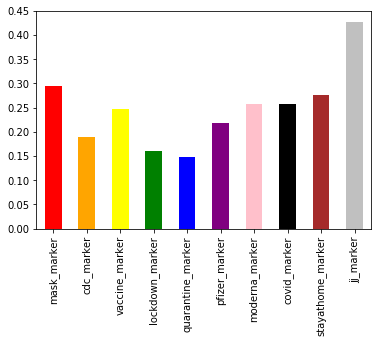

In [94]:
pos_plot = sent_markers.loc["POSITIVE", :].plot(kind = "bar", color = color_markers)

In [95]:
neutral_plot =sent_markers.loc["NEUTRAL", :].plot(kind = "bar", color = color_markers)

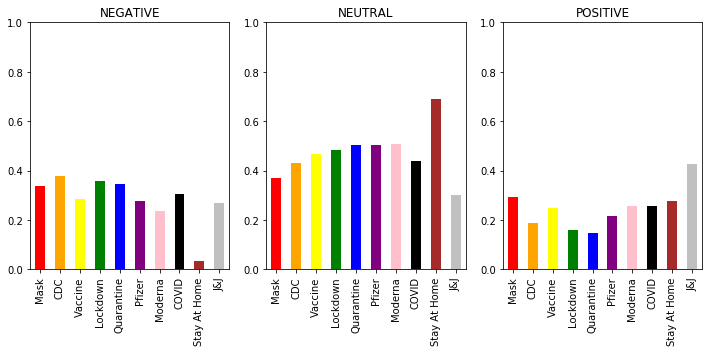

In [117]:

fig, axes = plt.subplots(nrows = 1, ncols =3)
sent_markers.loc["NEGATIVE", :].plot(ax = axes[0], kind = "bar", color = color_markers, subplots = True, ylim = (0,1))
sent_markers.loc["NEUTRAL", :].plot(ax = axes[1],kind = "bar", color = color_markers, subplots = True, ylim = (0,1));

sent_markers.loc["POSITIVE", :].plot(ax = axes[2], kind = "bar", color = color_markers, subplots = True, ylim = (0,1))
fig.set_figheight(5)
fig.set_figwidth(10)
fig.tight_layout()
plt.show();

In [133]:
vaccine_df = dd_df[["pfizer_marker", "moderna_marker", "jj_marker", "positive_score", "negative_score" ]]

In [135]:
vaccine_df["vaccine_type"] = 1 if vaccine_df[(vaccine_df.jj_marker == 1) & (vaccine_df.moderna_marker != 1) & (vaccine_df.pfizer_marker != 1)].shape[0].compute()

446

In [138]:
vaccine_ex = vaccine_df[vaccine_df.pfizer_marker + vaccine_df.moderna_marker + vaccine_df.jj_marker == 1]

In [144]:
vaccine_ex["vaccine_type"] = None

In [147]:
vaccine_ex.head()

pfizer_marker  moderna_marker  jj_marker  positive_score  negative_score  \
34             1.0             0.0        0.0        0.004163        0.304332   
193            0.0             1.0        0.0        0.066230        0.006793   
211            1.0             0.0        0.0        0.011621        0.564383   
654            0.0             1.0        0.0        0.162591        0.004386   
676            1.0             0.0        0.0        0.001843        0.177329   

    vaccine_type  
34          None  
193         None  
211         None  
654         None  
676         None

In [153]:
moderna = vaccine_ex.moderna_marker.apply(lambda x: 'Moderna' if x == 1 else '')
pfizer = vaccine_ex.pfizer_marker.apply(lambda x: 'Pfizer' if x == 1 else '')
jj = vaccine_ex.jj_marker.apply(lambda x: 'J&J' if x == 1 else '')
vaccine_ex['vaccine_type'] = moderna + pfizer + jj

/home/jadebenson/.local/lib/python3.7/site-packages/dask/dataframe/core.py:3544: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('pfizer_marker', 'object'))

  warnings.warn(meta_warning(meta))
/home/jadebenson/.local/lib/python3.7/site-packages/dask/dataframe/core.py:3544: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('jj_marke

In [160]:
vaccine_ex.head()

pfizer_marker  moderna_marker  jj_marker  positive_score  negative_score  \
34             1.0             0.0        0.0        0.004163        0.304332   
193            0.0             1.0        0.0        0.066230        0.006793   
211            1.0             0.0        0.0        0.011621        0.564383   
654            0.0             1.0        0.0        0.162591        0.004386   
676            1.0             0.0        0.0        0.001843        0.177329   

    vaccine_type  
34        Pfizer  
193      Moderna  
211       Pfizer  
654      Moderna  
676       Pfizer

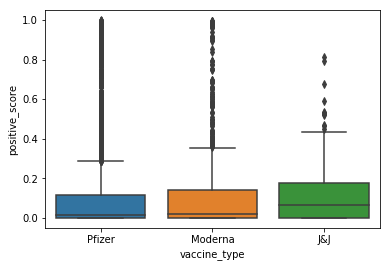

In [161]:
import seaborn as sns 
ax = sns.boxplot(x="vaccine_type", y = "positive_score", data = vaccine_ex.compute())

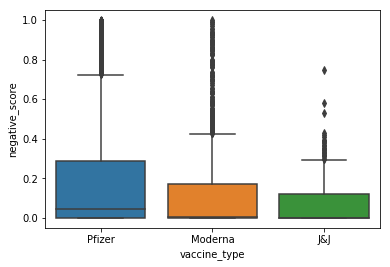

In [164]:
ax = sns.boxplot(x="vaccine_type", y = "negative_score", data = vaccine_ex.compute())

In [178]:
all_df["tweet_created_at"]=pd.to_datetime(all_df['tweet_created_at'], utc=True)

In [179]:
all_df["day"] = all_df.tweet_created_at.dt.day

In [183]:
#obviously our historical tweets didn't gather much data from earlier in the week
all_df.groupby("day").count()

Unnamed: 0  tweet_ID  user_location  tweet_created_at    text  hashtags  \
day                                                                            
1            27         0             21                27      27        27   
2         13426         0          10052             13426   13426     13426   
3        130638         0          96245            130638  130638     37484   
4        184025         0         138970            184025  184025    136206   
26           13         0             10                13      13        13   
27           15         0             10                15      15        15   
28           22         0             17                22      22        22   
29           21         0             17                21      21        21   
30           18         0             12                18      18        18   
31           19         0             16                19      19        19   

     sentiment_code  positive_score  negative_score  neutral_score  ...  \
day                                                                 ...   
1                27              27              27             27  ...   
2             13426           13426           13426          13426  ...   
3            130638          130638          130638         130638  ...   
4            184025          184025          184025         184025  ...   
26               13              13              13             13  ...   
27               15              15              15             15  ...   
28               22              22              22             22  ...   
29               21              21              21             21  ...   
30               18              18              18             18  ...   
31               19              19              19             19  ...   

     mask_marker  cdc_marker  vaccine_marker  lockdown_marker  \
day                                                             
1             27          27              27               27   
2          13426       13426           13426            13426   
3         130638      130638          130638           130638   
4         184025      184025          184025           184025   
26            13          13              13               13   
27            15          15              15               15   
28            22          22              22               22   
29            21          21              21               21   
30            18          18              18               18   
31            19          19              19               19   

     quarantine_marker  pfizer_marker  moderna_marker  covid_marker  \
day                                                                   
1                   27             27              27            27   
2                13426          13426           13426         13426   
3               130638         130638          130638        130638   
4               184025         184025          184025        184025   
26                  13             13              13            13   
27                  15             15              15            15   
28                  22             22              22            22   
29                  21             21              21            21   
30                  18             18              18            18   
31                  19             19              19            19   

     stayathome_marker  jj_marker  
day                                
1                   27         27  
2                13426      13426  
3               130638     130638  
4               184025     184025  
26                  13         13  
27                  15         15  
28                  22         22  
29                  21         21  
30                  18         18  
31                  19         19  

[10 rows x 23 columns]

In [191]:
all_df[["user_location", "tweet_created_at"]].groupby("user_location").count().sort_values(by = "tweet_created_at", ascending = False)

tweet_created_at
user_location                             
India                                 3698
United States                         3462
Australia                             1999
London, England                       1770
Los Angeles, CA                       1714
...                                    ...
Left my ❤ in Syria                       1
Left of the Dial                         1
Left off last laugh lane                 1
Left rough                               1
🫂                                        1

[73993 rows x 1 columns]

In [198]:
location_df = dd_df.dropna(how = "any", subset = ["user_location"])

In [199]:
location_df.head()

Unnamed: 0  tweet_ID       user_location     tweet_created_at  \
0           0       NaN  Harrogate, England  2021-06-02 16:44:15   
1           1       NaN       Mumbai, India  2021-06-02 16:44:15   
4           4       NaN       Karjat, India  2021-06-02 16:44:15   
6           6       NaN        Maui, Hawaii  2021-06-02 16:44:15   
7           7       NaN          Texas, USA  2021-06-02 16:44:15   

                                                text hashtags sentiment_code  \
0  If you think the Covid propaganda has been bad...       []       NEGATIVE   
1  1) If health is state subject, why's there a U...       []       NEGATIVE   
4  SAMAAVESHI - MAY2021 REPORT!\n\n1. COVID 2.0/F...       []        NEUTRAL   
6  We now know Mark Zuckerberg was influential in...       []       NEGATIVE   
7  @PaulRoundy1 Also, I don’t agree that the core...       []       NEGATIVE   

   positive_score  negative_score  neutral_score  ...  mask_marker  \
0        0.015496        0.697474       0.248183  ...          0.0   
1        0.001078        0.686785       0.312098  ...          0.0   
4        0.003424        0.000217       0.996354  ...          0.0   
6        0.068521        0.452579       0.428913  ...          0.0   
7        0.006331        0.622442       0.364168  ...          1.0   

   cdc_marker  vaccine_marker  lockdown_marker  quarantine_marker  \
0         0.0             0.0              0.0                0.0   
1         0.0             1.0              1.0                0.0   
4         0.0             0.0              0.0                0.0   
6         0.0             0.0              1.0                0.0   
7         0.0             0.0              0.0                0.0   

   pfizer_marker  moderna_marker  covid_marker  stayathome_marker  jj_marker  
0            0.0             0.0           1.0                0.0        0.0  
1            0.0             0.0           1.0                0.0        0.0  
4            0.0             0.0           1.0                0.0        0.0  
6            0.0             0.0           1.0                0.0        0.0  
7            0.0             0.0           0.0                0.0        0.0  

[5 rows x 23 columns]

In [203]:
chicago_df = location_df[location_df["user_location"].str.contains("Chicago")].compute()

In [205]:
ny_df = location_df[location_df["user_location"].str.contains("New York")].compute()

In [206]:
ny_df

Unnamed: 0  tweet_ID   user_location           tweet_created_at  \
80              84       NaN        New York        2021-06-02 17:25:01   
81              85       NaN        New York        2021-06-02 17:24:44   
82              86       NaN        New York        2021-06-02 17:24:30   
200            215       NaN    New York, NY        2021-06-02 18:34:11   
208            223       NaN    New York, NY        2021-06-02 18:34:10   
...            ...       ...             ...                        ...   
328071      393032       NaN  New York state  2021-06-03 17:20:42+00:00   
328095      393057       NaN    New York, NY  2021-06-03 17:20:48+00:00   
328143      393114       NaN    New York, NY  2021-06-03 17:21:01+00:00   
328173      393147       NaN        New York  2021-06-03 17:21:08+00:00   
328178      393152       NaN    New York, NY  2021-06-03 17:21:10+00:00   

                                                     text  \
80      Unlike Pfizer’s and Moderna’s vaccines, J&amp;...   
81      Unlike Pfizer’s and Moderna’s vaccines, J&amp;...   
82      Unlike Pfizer’s and Moderna’s vaccines, J&amp;...   
200     New York, New York!\n\nWe had ZERO COVID death...   
208     Excited to see many friends at @SAR_acuresearc...   
...                                                   ...   
328071         And she scores!👏👏👏 https://t.co/4lovTdwHdl   
328095  How about fixing this glitchy all too often NO...   
328143                 Good point https://t.co/HuSixCayl0   
328173  Does anyone have experience or guidance for a ...   
328178  How about fixing this glitchy, all too often N...   

                                                 hashtags sentiment_code  \
80                                                     []        NEUTRAL   
81                                                     []        NEUTRAL   
82                                                     []        NEUTRAL   
200                                                    []        NEUTRAL   
208     [{'text': 'acupuncture', 'indices': [132, 144]...       POSITIVE   
...                                                   ...            ...   
328071                                                NaN        NEUTRAL   
328095                                                NaN       POSITIVE   
328143                                                NaN       POSITIVE   
328173                                                NaN       POSITIVE   
328178                                                NaN       POSITIVE   

        positive_score  negative_score  neutral_score  ...  mask_marker  \
80            0.148736        0.005207       0.845964  ...          0.0   
81            0.133682        0.006765       0.859468  ...          0.0   
82            0.134220        0.006742       0.858978  ...          0.0   
200           0.422066        0.079912       0.488088  ...          0.0   
208           0.959807        0.000091       0.040064  ...          0.0   
...                ...             ...            ...  ...          ...   
328071        0.000000        0.000000       1.000000  ...          1.0   
328095        0.136000        0.000000       0.864000  ...          0.0   
328143        0.592000        0.000000       0.408000  ...          0.0   
328173        0.118000        0.000000       0.882000  ...          0.0   
328178        0.130000        0.000000       0.870000  ...          0.0   

        cdc_marker  vaccine_marker  lockdown_marker  quarantine_marker  \
80             0.0             1.0              0.0                0.0   
81             0.0             1.0              0.0                0.0   
82             0.0             1.0              0.0                0.0   
200            0.0             1.0              0.0                0.0   
208            0.0             0.0              0.0                0.0   
...            ...             ...              ...                ...   
328071         0.0             0.0        

In [211]:
cali_df = location_df[location_df["user_location"].str.contains("Los Angeles")].compute()

In [212]:
cali_df

Unnamed: 0  tweet_ID                   user_location  \
59              61       NaN                 Los Angeles, CA   
60              62       NaN                     Los Angeles   
141            149       NaN                 Los Angeles, CA   
262            278       NaN                     Los Angeles   
382            405       NaN                 Los Angeles, CA   
...            ...       ...                             ...   
327729      392565       NaN                 Los Angeles, CA   
327889      392833       NaN    Los Angeles California, USA    
327935      392884       NaN                 Los Angeles, CA   
327936      392885       NaN                 Los Angeles, CA   
327973      392926       NaN                 Los Angeles, CA   

                 tweet_created_at  \
59            2021-05-29 19:05:47   
60            2021-05-29 09:07:55   
141           2021-05-29 21:02:04   
262           2021-06-02 18:34:05   
382           2021-06-02 18:33:54   
...                           ...   
327729  2021-06-03 17:19:11+00:00   
327889  2021-06-03 17:20:03+00:00   
327935  2021-06-03 17:20:10+00:00   
327936  2021-06-03 17:20:10+00:00   
327973  2021-06-03 17:20:19+00:00   

                                                     text  \
59      @nadsshoes @WastedAerospace @michellmybell1 @g...   
60      According to (VAERS), between Dec. 14, 2020 an...   
141     Slowly and quietly, life is stirring!\n\n#covi...   
262     Myles Garrett admits COVID slowed him down at ...   
382     We offer FREE #COVID19 tests &amp; vaccines! G...   
...                                                   ...   
327729  Powerful story so well told: Deathly ill COVID...   
327889  As COVID-19 collides with HIV/AIDS, the pandem...   
327935  Need your first dose of COVID-19 vaccine? Cano...   
327936  Total Confirmed Covid Cases by County For WV  ...   
327973  If sum happens after this vaccine I’m killing ...   

                                                 hashtags sentiment_code  \
59                                                     []        NEUTRAL   
60                                                     []        NEUTRAL   
141     [{'text': 'covid', 'indices': [39, 45]}, {'tex...        NEUTRAL   
262                                                    []        NEUTRAL   
382            [{'text': 'COVID19', 'indices': [33, 41]}]        NEUTRAL   
...                                                   ...            ...   
327729                                                NaN       NEGATIVE   
327889                                                NaN       NEGATIVE   
327935                                                NaN        NEUTRAL   
327936                                                NaN       POSITIVE   
327973                                                NaN       NEGATIVE   

        positive_score  negative_score  neutral_score  ...  mask_marker  \
59            0.000348        0.000498       0.999133  ...          0.0   
60            0.002978        0.048439       0.948558  ...          0.0   
141           0.137064        0.140107       0.401807  ...          0.0   
262           0.016013        0.191630       0.767477  ...          0.0   
382           0.279078        0.000660       0.720108  ...          0.0   
...                ...             ...            ...  ...          ...   
327729        0.195000        0.206000       0.599000  ...          0.0   
327889        0.000000        0.273000       0.727000  ...          0.0   
327935        0.000000        0.000000       1.000000  ...          0.0   
327936        0.094000        0.000000       0.906000  ...          0.0   
327973        0.000000        0.447000       0.553000  ...          0.0   

        cdc_marker  vaccine_marker  lockdown_marker  quarantine_marker  \
59             0.0             1.0              0.0                0.0   
60             0.0             0.0              0.0                0.0   
141            0.0       

In [219]:
TX_df = location_df[location_df["user_location"].str.contains(", TX")].compute()

In [221]:
CA_df = location_df[location_df["user_location"].str.contains(", CA")].compute()

In [223]:
IL_df = location_df[location_df["user_location"].str.contains(", IL")].compute()

In [225]:
NY_df = location_df[location_df["user_location"].str.contains(", NY")].compute()

In [227]:
FL_df = location_df[location_df["user_location"].str.contains(", FL")].compute()

In [229]:
TX_mask = TX_df[TX_df.mask_marker == 1]

In [231]:
TX_mask["negative_score"].mean()

0.20813824228996275

In [232]:
TX_vax = TX_df[TX_df.vaccine_marker == 1]

In [233]:
TX_vax["negative_score"].mean()

0.1582269304618941

In [234]:
CA_mask = CA_df[CA_df.mask_marker == 1]
CA_mask["negative_score"].mean()

0.1842464308947603

In [235]:
CA_vax = CA_df[CA_df.vaccine_marker == 1]
CA_vax["negative_score"].mean()

0.15010719028620165

In [236]:
IL_mask = IL_df[IL_df.mask_marker == 1]
IL_mask["negative_score"].mean()

0.13527662824894465

In [237]:
IL_vax = IL_df[IL_df.vaccine_marker == 1]
IL_vax["negative_score"].mean()

0.14882868657999307

In [238]:
NY_mask = NY_df[NY_df.mask_marker == 1]
NY_mask["negative_score"].mean()

0.14032533761718277

In [239]:
NY_vax = NY_df[NY_df.vaccine_marker == 1]
NY_vax["negative_score"].mean()

0.14391323534938485

In [240]:
FL_mask = FL_df[FL_df.mask_marker == 1]
FL_mask["negative_score"].mean()

0.1979454719919347

In [241]:
FL_vax = FL_df[FL_df.vaccine_marker == 1]
FL_vax["negative_score"].mean()

0.16787006401709967

<BarContainer object of 5 artists>

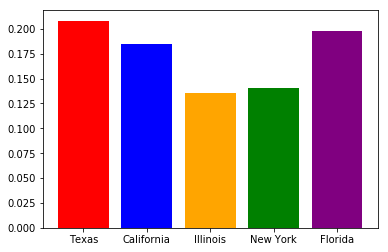

In [256]:
plt.bar(x= ["Texas", "California", "Illinois", "New York", "Florida"], height = [TX_mask["negative_score"].mean(), 
                                                                              CA_mask["negative_score"].mean(), 
                                                                             IL_mask["negative_score"].mean(), 
                                                                             NY_mask["negative_score"].mean(), 
                                                                             FL_mask["negative_score"].mean()], 
       color = ["red", "blue", "orange", "green", "purple"])

<BarContainer object of 5 artists>

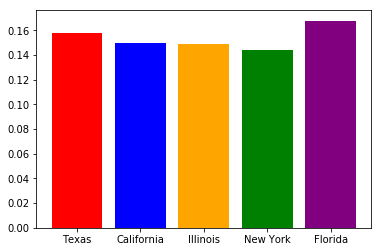

In [255]:
plt.bar(x= ["Texas", "California", "Illinois", "New York", "Florida"], height = [TX_vax["negative_score"].mean(), 
                                                                              CA_vax["negative_score"].mean(), 
                                                                             IL_vax["negative_score"].mean(), 
                                                                             NY_vax["negative_score"].mean(), 
                                                                             FL_vax["negative_score"].mean()], 
       color = ["red", "blue", "orange", "green", "purple"])